# Haberman's Survival Dataset



Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) 
         (b) Date: March 4, 1999

Past Usage:
         1.Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models,               Proceedings of the 9th International Biometrics Conference,                     Boston, pp.104-122.
         2.Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical               Models for Assessing Logistic Regression Models (with                           discussion), Journal of the American Statistical Association 79:                 61-83.
         3.Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department                  of Statistics, University of Wisconsin, Madison, WI.
         
Relevant Information: 
                   The dataset contains cases from a study that was conducted                      between 1958 and 1970 at the University of Chicago's Billings                    Hospital on the survival of patients who had undergone                          surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:
                   Age of patient at time of operation (numerical)
                    
                   Patient's year of operation (year - 1900, numerical)
                   
                   Number of positive axillary nodes detected (numerical)
                   
                   Survival status (class attribute) 
                   1 = the patient survived 5 years or longer 
                   2 = the patient died within 5 year
                   
                   Missing Attribute Values: None

Axillary lymph nodes and its relation to breast cancer:   https://www.medicalnewstoday.com/articles/319713.php

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set/downloads/habermans-survival-data-set.zip/1'''
#Load Haberman.csv into a pandas dataFrame.
haber = pd.read_csv("haberman.csv")
haber.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
#(Q) What are the column names in our dataset?
print (haber.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [2]:
#(Q) How many data points for each class are present? 
#(or) How many patient survived more than 5 years and how many could not survive?
# 1 = survived 5 years or longer
# 2 = died within 5 years
haber["status"].value_counts()
#haber is a imbalanced dataset as the number of data points for the two class varies a lot.

1    225
2     81
Name: status, dtype: int64

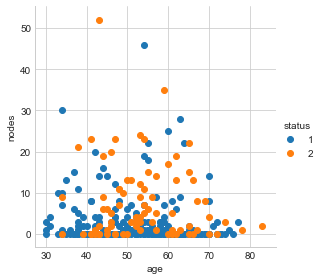

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

### Observation(s):
1. The no of positive axillary nodes detected in a patient does not             depend on patient age
2. In the maximum no of cases, no of positive axillary nodes detected           was less than 10

##  Pair Plot

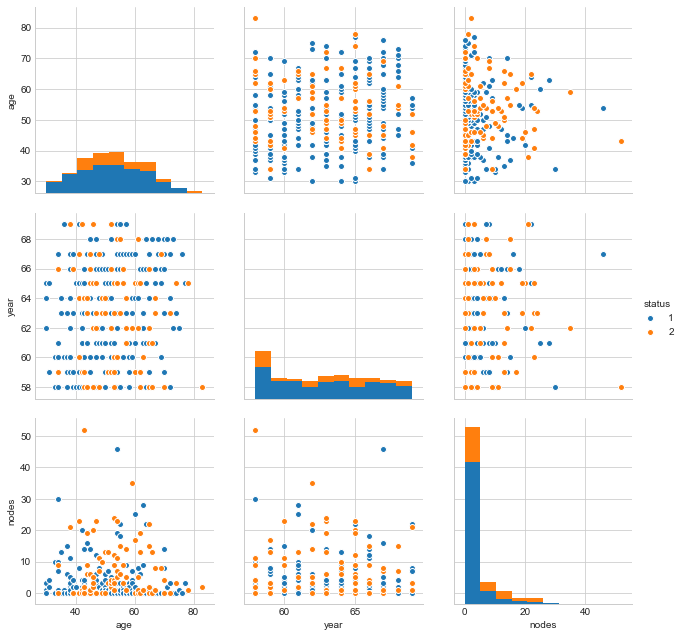

In [23]:
sns.set_style("whitegrid");
sns.pairplot(haber, hue="status", size=3, vars=['age','year','nodes']);


### Observation(s):
1. There is no relation between the no of positive axillary                     nodes detected and the duration of survival of the patient.
                
2. There is no relation between the age of the patient and the                   duration of survival of the patient.
             
Reason-
Possibly due to advancement in our understanding of cancer                      and treatment of it.
                
3. Individuals of Every age group is effected by it in every                      year. i.e. not a specific age group is effected by it or not                    sudden rise of cancer cases in any specific year.

## Histogram, PDF, CDF

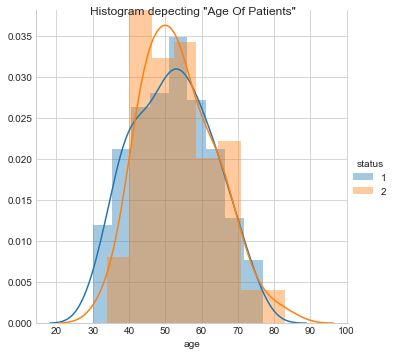

In [46]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend() \
   .fig.suptitle('Histogram depecting "Age Of Patients"');
plt.show();


### Observation(s):
1. The above PDF graph clearly depicts that the duration of the                  survival of the patient does not depends on the age of the                      patient

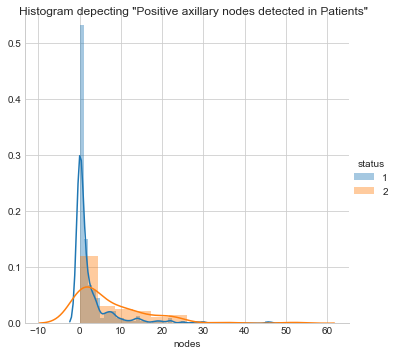

In [47]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend() \
   .fig.suptitle('Histogram depecting "Positive axillary nodes detected in Patients"');
plt.show();


### Observation(s):
1. In the above graph also , the PDF distribution of both the Status              1 and Status 2 are almost overlapping, therefore we cant conlude                that as the no of positive axillary nodes increases survival                    rate decreases. 
               
However as the detected no of nodes increases there is a very                    slight increase of patient death is observed but this cant be                    stated as a fact because the dataset is too small.
            
2. From the above graph, it can be stated that maximum number of                  patients had less than 10 positive axillary nodes detected

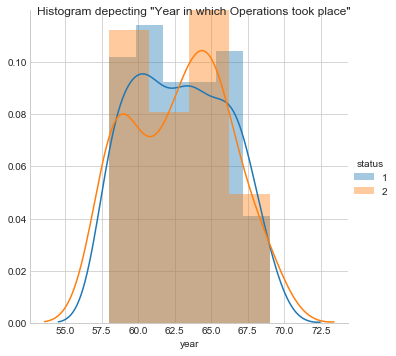

In [49]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend() \
   .fig.suptitle('Histogram depecting "Year in which Operations took place"');
plt.show();


### Observation(s) :
1. The above graph clearly depicts that there was no sudden rise or              decline of deaths due to breast cancer in any interval of time

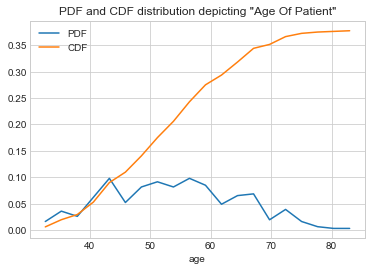

In [25]:
# Choose how many bins you want here
num_bins = 20

# Use the histogram function to bin the data
counts, bin_edges = np.histogram(haber['age'], bins=num_bins, normed=True)

# Find the pdf
pdf = counts/(sum(counts))

# Now find the cdf
cdf = np.cumsum(counts)

# plot the pdf
plt.plot(bin_edges[1:], pdf, label='PDF')

# And finally plot the cdf
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('age')
plt.legend(loc='upper left')
plt.title('PDF and CDF distribution depicting "Age Of Patient"')
plt.show()



### Observation(s) :
                1. Maximum no of patients were between the age 40 to 60

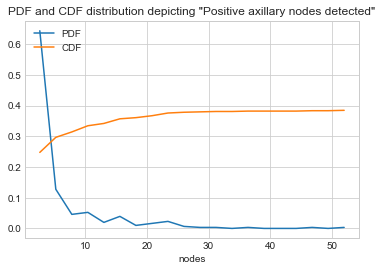

In [26]:
# Use the histogram function to bin the data
counts, bin_edges = np.histogram(haber['nodes'], bins=num_bins, normed=True)

# Find the pdf
pdf = counts/(sum(counts))

# Now find the cdf
cdf = np.cumsum(counts)

# plot the pdf
plt.plot(bin_edges[1:], pdf, label='PDF')

# And finally plot the cdf
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('nodes')
plt.legend(loc='upper left')
plt.title('PDF and CDF distribution depicting "Positive axillary nodes detected"')
plt.show()


### Observation(s) :
1. Maximum patients were detected with less than 10 positive                      axillary nodes

### Statistic about the age of patients 

In [18]:
g=haber.groupby('status')
print(g.describe().age)

        count       mean        std   min   25%   50%   75%   max
status                                                           
1       225.0  52.017778  11.012154  30.0  43.0  52.0  60.0  77.0
2        81.0  53.679012  10.167137  34.0  46.0  53.0  61.0  83.0


### Statistic about the no of positive axillary nodes detected in patients 

In [19]:
print(g.describe().nodes)

        count      mean       std  min  25%  50%   75%   max
status                                                      
1       225.0  2.791111  5.870318  0.0  0.0  0.0   3.0  46.0
2        81.0  7.456790  9.185654  0.0  1.0  4.0  11.0  52.0


### Observation(s):
The above statistcs is showing that as the detected no of positive               axillary nodes increases , very slight increase of patient death is             observed but this cant be stated as a fact because the dataset is               too small and many other factors like patient previous medical                   history is ignored and his living conditions are ignored.

## Box plots and Whiskers


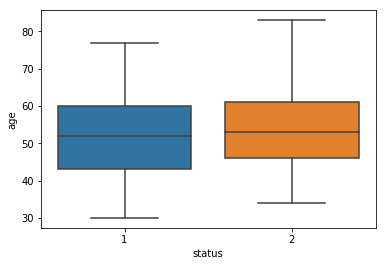

In [20]:
sns.boxplot(x='status',y='age', data=haber)
plt.show()

### Observation(s) :
1.The above Box-plot graph clearly depicts that the duration                     of the survival of the patient does not depends on the age of                   the patient

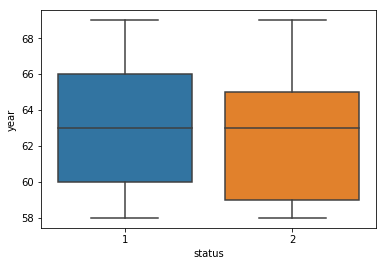

In [21]:
sns.boxplot(x='status',y='year', data=haber)
plt.show()

### Observation(s) :
1. The above graph clearly depicts that there was no sudden rise or             decline of deaths due to breast cancer in any interval of time

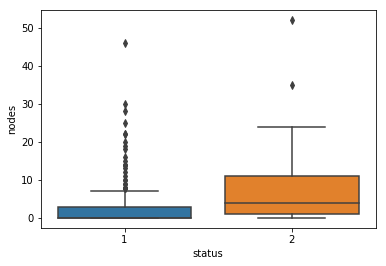

In [22]:
sns.boxplot(x='status',y='nodes', data=haber)
plt.show()

### Observation(s) :
1. From the above graph, it can be stated that maximum number of                 patients had less than 10 positive axillary nodes detected

## Violin Plots

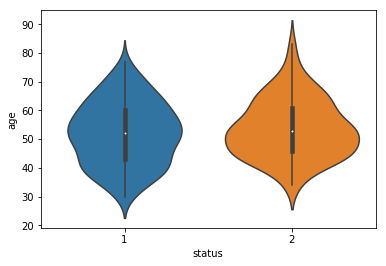

In [11]:
sns.violinplot(x="status", y="age", data=haber, size=8)
plt.show()

### Observation(s) :
1.The above violin-plot clearly depicts that the duration                       of the survival of the patient does not depends on the age of                   the patient 

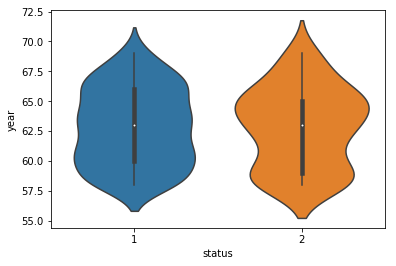

In [25]:
sns.violinplot(x="status", y="year", data=haber, size=8)
plt.show()

### Observation(s) :
1. The above graph clearly depicts that there was no sudden rise or              decline of deaths due to breast cancer in any interval of time

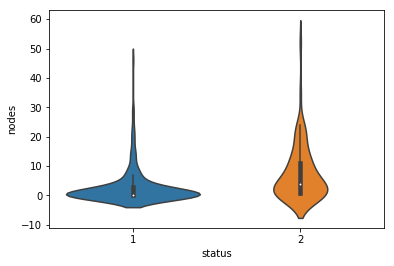

In [26]:
sns.violinplot(x="status", y="nodes", data=haber, size=8)
plt.show()

### Observation(s) :
1. From the above graph, it can be stated that maximum number of                 patients had less than 10 positive axillary nodes detected 

## Multivariate probability density, contour plot.

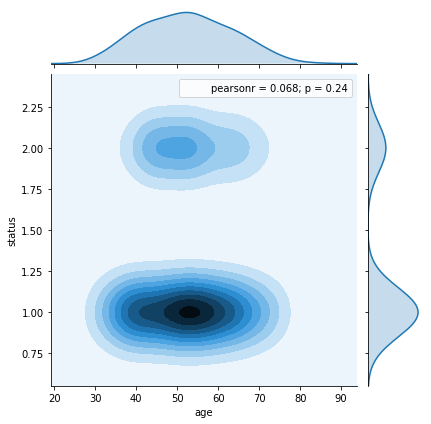

In [3]:

sns.jointplot(x="age", y="status", data=haber, kind="kde");
plt.show();

### Observation(s):
1. From the above graph , it can be seen that the age of the                     patient lies between 30 to 75 and very few patients survived less than 5 years after the surgery. For most of the patients, the surgery was successfull and they survived for more than 5 years

# Conclusion 

1. The age of the patients and the duration of their survival has no co relation mainly due to the advancement in our healthcare facilities and our understanding of the cancer disease. So we are able to cure cancer patients irrespective of their age.

2. The no of positive axillary nodes detected is slightly more in those patients who died within 5 years after surgery. It can be observed that treating patient with more no of detected positive axillary nodes is not that much successful but it cant be stated as a fact because the dataset is too small and many other factors related to the patients are ignored such as previous medical history and also the slight change in no of patient died is very less.

3. Overall we are very much capable of treating breast cancer and save a person's life as the no of successfull surgeries are 225 and unsuccessfull are 81